# NLTK基础

In [3]:
import nltk
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [ ]:
text1.concordance("former") # 搜索文本

In [ ]:
text1.similar("ship")  # 搜索相关词

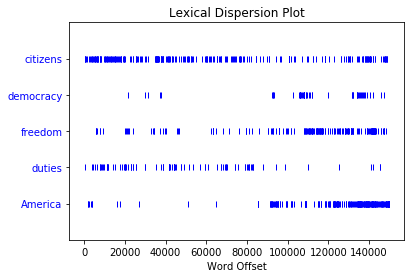

In [8]:
# 查看某个词在文章里出现的位置
text4.dispersion_plot(["citizens", "democracy", "freedom", "duties", "America"])

## 词统计


In [ ]:
len(text1)：返回总字数  
set(text1)：返回文本的所有词集合  
len(set(text1))：返回文本总词数  
text4.count("is")：返回"is"这个词出现的总次数  
FreqDist(text1)：统计文章的词频并按从大到小排序存到一个列表里  

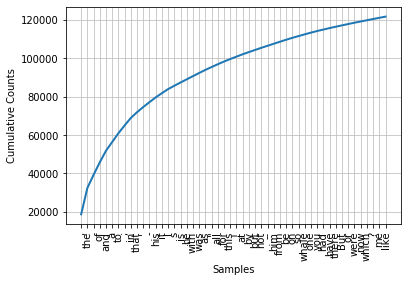

In [13]:
fdist1 = FreqDist(text1);
fdist1.plot(50, cumulative=True)  # 统计词频并输出累计图像

In [10]:
fdist1.hapaxes()  # 返回只出现一次的词
text4.collocations()  # 频繁的双联词

United States; fellow citizens; four years; years ago; Federal
Government; General Government; American people; Vice President; God
bless; Chief Justice; Old World; Almighty God; Fellow citizens; Chief
Magistrate; every citizen; one another; fellow Americans; Indian
tribes; public debt; foreign nations


# NLTK语料库


In [8]:
nltk.corpus.gutenberg.fileids()   # Gutenberg语料库

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

nltk.corpus.gutenberg就是gutenberg语料库的阅读器，它有很多实用的方法，比如：  
nltk.corpus.gutenberg.raw('chesterton-brown.txt')：输出chesterton-brown.txt文章的原始内容  
nltk.corpus.gutenberg.words('chesterton-brown.txt')：输出chesterton-brown.txt文章的单词列表  
nltk.corpus.gutenberg.sents('chesterton-brown.txt')：输出chesterton-brown.txt文章的句子列表  
<br/> 
类似的语料库还有：  
from nltk.corpus import webtext：网络文本语料库，网络和聊天文本  
from nltk.corpus import brown：布朗语料库，按照文本分类好的500个不同来源的文本  
from nltk.corpus import reuters：路透社语料库，1万多个新闻文档  
from nltk.corpus import inaugural：就职演说语料库，55个总统的演说  

## 语料库的一般结构
以上各种语料库都是分别建立的，因此会稍有一些区别，但是不外乎以下几种组织结构：散养式（孤立的多篇文章）、分类式（按照类别组织，相互之间没有交集）、交叉式（一篇文章可能属于多个类）、渐变式（语法随着时间发生变化）  
<br/>  
## 语料库的通用接口
fileids()：返回语料库中的文件  
categories()：返回语料库中的分类  
raw()：返回语料库的原始内容  
words()：返回语料库中的词汇  
sents()：返回语料库句子  
abspath()：指定文件在磁盘上的位置  
open()：打开语料库的文件流  

## 加载自己的语料库
收集自己的语料文件（文本文件）到某路径下（比如/tmp)，然后执行：

In [4]:
from nltk.corpus import PlaintextCorpusReader
corpus_root = '自定义语料库路径'
wordlists = PlaintextCorpusReader(corpus_root, '.*')  # 使用阅读器导入语料库
wordlists.fileids()  

OSError: No such file or directory: 'D:\\JupyterNotebook\\MyNotes\\NLPLearning\\自己动手做聊天机器人\\自定义语料库路径'

### 条件分布概率
在一定条件下某个事件的概率分布，自然语言处理的条件频率分布就是指定条件下某个事件的频率分布。  
比如要输出在布朗语料库中每个类别条件下每个词的概率：

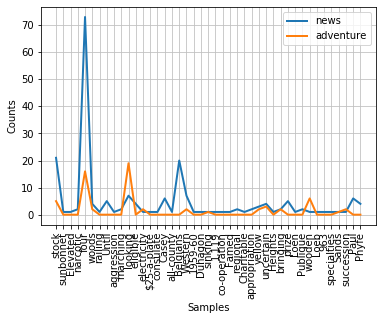

In [14]:
# coding:utf-8

import sys
import nltk
from nltk.corpus import brown

# 链表推导式，genre是brown语料库里的所有类别列表，word是这个类别中的词汇列表
# (genre, word)就是类别加词汇对
genre_word = [(genre, word)
             for genre in brown.categories()
             for word in brown.words(categories=genre)
             ]
# 创建条件频率分布
cfd = nltk.ConditionalFreqDist(genre_word)

# 指定条件和样本作图
cfd.plot(conditions=['news', 'adventure'], samples=[u'stock', u'sunbonnet', u'Elevated',
                                                    u'narcotic', u'four', u'woods', u'railing',
                                                    u'Until', u'aggression', u'marching', u'looking',
                                                    u'eligible', u'electricity', u'$25-a-plate',
                                                    u'consulate', u'Casey', u'all-county', 
                                                    u'Belgians', u'Western', u'1959-60', 
                                                    u'Duhagon', u'sinking', u'1,119',
                                                    u'co-operation', u'Famed', u'regional',
                                                    u'Charitable', u'appropriation', 
                                                    u'yellow', u'uncertain', u'Heights',
                                                    u'bringing', u'prize', u'Loen',
                                                    u'Publique', u'wooden', u'Loeb', 
                                                    u'963', u'specialties', u'Sands', 
                                                    u'succession', u'Paul', u'Phyfe'])

注意：这里如果把plot直接换成tabulate ，那么就是输出表格形式，和图像表达的意思相同   
<br/> 
我们还可以利用条件频率分布，按照最大条件概率生成双连词，最终生成一个随机文本  
这可以直接使用bigrams()函数，它的功能是生成词对链表。  
创建python文件如下：

In [20]:
def genrate_model(cfdist, word, num=20):
    for i in range(num):
        word=cfdist[word].max()
        print(word, end=' ')
        
# 加载语料库，生成双连词,获得该语料库中所有的双连词
bigrams = nltk.bigrams(text4)

# 生成条件频率分布
cfd = nltk.ConditionalFreqDist(bigrams)

# 以the开头，生成随机串
genrate_model(cfd, 'the')

people , and the people , and the people , and the people , and the people , and the 

### 其他词典资源
有一些仅是词或短语以及一些相关信息的集合，叫做词典资源。  
词汇列表语料库：**nltk.corpus.words.words()**，所有英文单词，这个可以用来识别语法错误  
停用词语料库：**nltk.corpus.stopwords.words**，用来识别那些最频繁出现的没有意义的词  
发音词典：**nltk.corpus.cmudict.dict()**，用来输出每个英文单词的发音    
比较词表：**nltk.corpus.swadesh**，多种语言核心200多个词的对照，可以作为语言翻译的基础    
同义词集：WordNet，面向语义的英语词典，由同义词集组成，并组织成一个网络    